### Neural Networks
* Layered representation of data
* "deep" refers to presence of multiple layers
* for traditional ML algorithms data is not transformed or modified within the model
* NN attempts to represent data in different ways and different diemsnions
* On lower level NN are combination of elementary maths operations and some advanced linear algebra
* Sequence of layers through which the data passes
* Consists of multiple neurons
* Neurons in multiple layers are connected with weights
* Each layer also has bias - single neuron with no connection to previous layer
* Input layer, output layer and hidden layers
* For multi-class output, the output nodes represent probability distribution
* Trainable parameters    
    * Weights or params
    * bias - another layer of complexity
* Activation functions - sigmoid, tanh, ReLU
    * move up in dimensionality
* Start with random weights and random biases
* Loss function - how far away our computed output was from actual output
    * Mean Absolute Error
    * Mean Squared Error
* Backpropagation
* Optimizer Function - Gradient Descent
    * Find the global minimum (global optima)
    * determine which direction we should move (direction/steepness) to minimize loss
* Training Process
    * Feed forward - make predictions
    * Cost/loss function - evaluate how close the predictions were to known labels
    * Gradient Descent - Find direction/steepness to minimie loss
    * Back propagation
    * Update parameters
    * Repeat the iterative process

#### Keras
* high level NN API
* capable on running on top of TF, CNTK, Theano
* developed with a focus on fast experimentation
* easy and fast prototyping (user friendliness, modularity and extensibility)
* Supports both CNN and RNN
* Runs on both CPU and GPU
* Hides mathematical complexity

#### Data
* shape and data-type
* vector data (2D)
* Time series or sequence (3D)
* Image data (4D)
* Video data (5D)
#### Layers
* NN consists of multiple layers
* input, hidden and output
* more complex the model, more the number of hidden layers
#### Neurons
* Each layer is made up on multiple neurons (computing units)
* Each neuron is responsible for generating/holding/passing 1 numeric values
* Input layer will have no. of neurons corresponding to input data
* Output layers will have neurons = no. of output classes
* Hidden layer can have any number of neurons
#### Connected Layers
* Neurons in a layer are connected to neurons in subsequent layers
* Neurons can be connoected in a variety of different ways
* Fully connected (dense), dropout etc
#### Weights
* associated with each connection in NN
* denotes the strength of connection
* trainable paramter - tweaked as NN is trained
* start out with a constant or random value
#### Bias
* trainable paramter - tweaked as NN is trained
* constant value associated with each layer - one bias for each layer
* extra neuron with no connections to previous layer
* purpose is to shift an entire activation by constant value
#### Activation Function
* applied to weighted sum of a neuron
* ReLU - rectified linear unit
* sigmoid (0, 1)
* tanh (-1, 1)
#### Back-propagation
* fundamental algorithm behind training NN
* It is what that changes the trainable parameters (weights and biases)
* Loss/Cost Function
    * NN feeds forward data through layers until it eventually reached output layer
    * Evaluate how well the NN is doing
    * compare the output from NN with the expected output (label)
    * determines how far the predicted output is from the expected output
    * MAE, MSQ, Hinge Loss
* Optimizer
    * Algorithm used to determine optimal parameters (weights and biases)
    * used to minimize the loss/cost function
    * gradient descent
    * stochastic gradient descent
    * mini-batch gradient descent
    * momentum
    * Nesterov accelerated gradient descent
* Gradient Descent is an optimization algo used to minimize loss by iteratively moving in the direction of steepest descent
* Backpropagation is the process of calculating the gradient descent step
* requires understanding of calculus and linear algebra
* 

In [2]:
# TensorFlow and tf.keras
import tensorflow as tf
from tensorflow import keras

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt

#### Data
* MNIST fashion dataset
* Included with Keras
* includes 60K images for training and 10K for testing

In [3]:
fashion_mnist = keras.datasets.fashion_mnist    # load dataset
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()    # split int training and test dataset

In [8]:
train_images.shape
# 60K images with each image 28x28 pixels

(60000, 28, 28)

In [13]:
train_images[0, 23, 23]
# Each pixel for grey scale images is a value between 0-255
# 0 = black and 255 = white

194

In [12]:
type(train_images)

numpy.ndarray

In [16]:
train_labels[0:10]

array([9, 0, 0, 3, 0, 2, 7, 2, 5, 5], dtype=uint8)

In [18]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

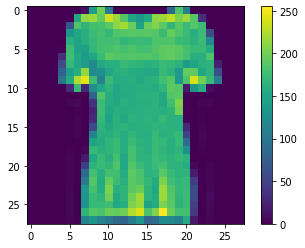

In [23]:
plt.figure()
plt.imshow(train_images[10])
plt.colorbar()
plt.grid(False)
plt.show()

#### Data Preprocessing

In [24]:
train_images = train_images / 255.0
test_images = test_images / 255.0

#### Building the model

In [26]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)),    # input layer 1
    keras.layers.Dense(128, activation='relu'),   # hidden layer 2
    keras.layers.Dense(10, activation='softmax') # output layer 3
])

#### Compile the model

In [27]:
model.compile(optimizer = 'adam',
             loss = 'sparse_categorical_crossentropy',
             metrics = ['accuracy'])

#### Training the model

In [28]:
model.fit(train_images, train_labels, epochs=10)

Train on 60000 samples
Epoch 1/10
60000/60000 [==============================] - 12s 207us/sample - loss: 0.5007 - accuracy: 0.8264
Epoch 2/10
60000/60000 [==============================] - 11s 185us/sample - loss: 0.3778 - accuracy: 0.8642
Epoch 3/10
60000/60000 [==============================] - 13s 213us/sample - loss: 0.3358 - accuracy: 0.8777
Epoch 4/10
60000/60000 [==============================] - 13s 214us/sample - loss: 0.3116 - accuracy: 0.8862
Epoch 5/10
60000/60000 [==============================] - 13s 222us/sample - loss: 0.2950 - accuracy: 0.8903
Epoch 6/10
60000/60000 [==============================] - 13s 219us/sample - loss: 0.2789 - accuracy: 0.8964
Epoch 7/10
60000/60000 [==============================] - 14s 234us/sample - loss: 0.2676 - accuracy: 0.8993
Epoch 8/10
60000/60000 [==============================] - 14s 225us/sample - loss: 0.2546 - accuracy: 0.9053
Epoch 9/10
60000/60000 [==============================] - 14s 231us/sample - loss: 0.2459 - accuracy: 0.9

#### Evaluating the model

In [29]:
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=1) 

print('Test accuracy:', test_acc)

10000/10000 [==============================] - 1s 114us/sample - loss: 0.3233 - accuracy: 0.8882
Test accuracy: 0.8882


In [32]:
predictions = model.predict(test_images)

In [42]:
print(class_names[np.argmax(predictions[5])])

Trouser


Pick a number: 34


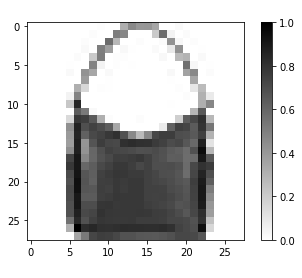

In [43]:
COLOR = 'white'
plt.rcParams['text.color'] = COLOR
plt.rcParams['axes.labelcolor'] = COLOR

def predict(model, image, correct_label):
  class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
  prediction = model.predict(np.array([image]))
  predicted_class = class_names[np.argmax(prediction)]

  show_image(image, class_names[correct_label], predicted_class)


def show_image(img, label, guess):
  plt.figure()
  plt.imshow(img, cmap=plt.cm.binary)
  plt.title("Excpected: " + label)
  plt.xlabel("Guess: " + guess)
  plt.colorbar()
  plt.grid(False)
  plt.show()


def get_number():
  while True:
    num = input("Pick a number: ")
    if num.isdigit():
      num = int(num)
      if 0 <= num <= 1000:
        return int(num)
    else:
      print("Try again...")

num = get_number()
image = test_images[num]
label = test_labels[num]
predict(model, image, label)